<a href="https://colab.research.google.com/github/MaggieHDez/MathStatsAI/blob/main/loteAprendizajeAutomatico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para el ejemplo 1: B* ≈ 135.72088082974528

Para el ejemplo 2: B* ≈ 1357.2088082974528

**************************************************



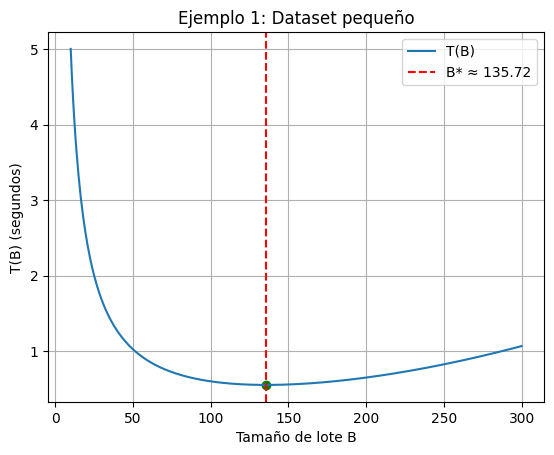

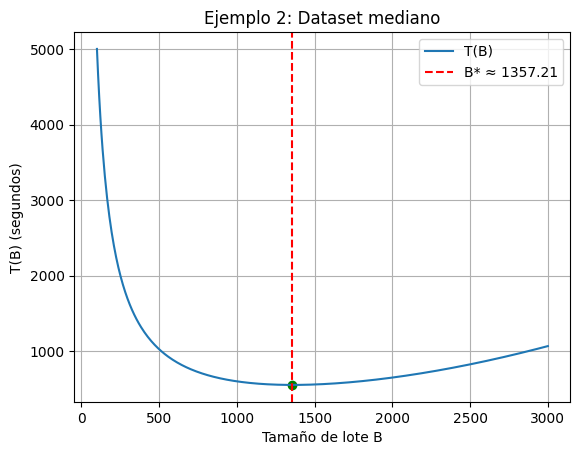

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Ejem 1: Dataset pequeño
n_total1 = 1e4 # 10,000 ejemplos
t0_1 = 0.005 # 5ms. Como el valor es entre 1ms y 10ms
c1 = 1e-5
min_B1, max_B1, num_puntos1 = 10, 300, 400 # Rango y cantidad de puntos

# Ejem 2: Dataset mediano
n_total2 = 1e6 # 1,000,000 de ejemplos
t0_2 = 0.5 # 0.5s. Como el valor es entre 0.1s y 1s
c2 = 1e-4
min_B2, max_B2, num_puntos2 = 100, 3000, 400 # Rango y cantidad de puntos

# Función para B*
def calculoB (n, t , c):
  return (t * n / (2 * c))**(1/3)

#  Para calcular T y B
def calcular_T_B(N_total, t0, c, B_min, B_max, num_points):
  valores_B = np.linspace(B_min, B_max, num_points)
  valores_T = (N_total * t0) / valores_B + c * valores_B**2
  return valores_B, valores_T

# Función para graficar
def graficar(valores_b, funcion_T,valor_N, valor_c, valor_B, valor_t, ejemplo):
  plt.figure()
  plt.plot(valores_b, funcion_T, label='T(B)')
  plt.axvline(valor_B, color='r', linestyle='--', label=f'B* ≈ {valor_B:.2f}')
  plt.scatter(valor_B, (valor_N * valor_t)/valor_B + valor_c*valor_B**2, color='red') # el punto exacto de (B*, T(B*))
  plt.xlabel('Tamaño de lote B')
  plt.ylabel('T(B) (segundos)')
  plt.title(f'Ejemplo {ejemplo}')
  plt.legend()
  plt.grid(True)
  plt.show()


b_asterisco1 = calculoB(n_total1, t0_1, c1) # B*
b_asterisco2 = calculoB(n_total2, t0_2, c2) # B*
print('Para el ejemplo 1: B* ≈',b_asterisco1)
print('\nPara el ejemplo 2: B* ≈',b_asterisco2)
print('\n**************************************************\n')
valores_B1,funcion_T1 = calcular_T_B(n_total1, t0_1, c1, min_B1, max_B1, num_puntos1)
valores_B2,funcion_T2 = calcular_T_B(n_total2, t0_2, c2, min_B2, max_B2, num_puntos2)
graficar(valores_B1, funcion_T1, n_total1, c1, b_asterisco1, t0_1, '1: Dataset pequeño')
graficar(valores_B2, funcion_T2, n_total2, c2, b_asterisco2, t0_2, '2: Dataset mediano')
